In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install surprise
!pip install numpy==1.26.4

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ***Creating The Data***

In [ ]:
data_customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/olist_customers_dataset.csv')
data_order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/olist_order_items_dataset.csv')
data_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/olist_order_reviews_dataset.csv')
data_order_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/olist_order_payments_dataset.csv')
data_orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/olist_orders_dataset.csv')
data_product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/olist_products_dataset.csv')
data_category = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/product_category_name_translation.csv')

In [ ]:
data_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
merged_data = pd.merge(data_customer , data_orders , on='customer_id', how='left')
merged_data = pd.merge(merged_data , data_order_items , on='order_id', how='left')
merged_data = pd.merge(merged_data , data_product , on='product_id', how='left')
merged_data = pd.merge(merged_data , data_order_payments , on='order_id', how='left')
merged_data = pd.merge(merged_data , data_reviews , on='order_id', how='left')
merged_data = pd.merge(merged_data , data_category , on='product_category_name', how='left')

In [ ]:
merged_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name_english'],
      dtype='object')

In [ ]:
lis = [ 'customer_zip_code_prefix',
       'customer_city', 'customer_state','order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value' , 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp',
       ]

merged_data.drop(lis , axis=1,inplace=True)

In [ ]:
merged_data.columns

Index(['customer_id', 'customer_unique_id', 'order_id', 'product_id',
       'review_id', 'review_score', 'product_category_name_english'],
      dtype='object')

In [ ]:
merged_data.shape

(119143, 7)

In [ ]:
clean_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/clean_data.csv')
clean_data.columns

Index(['Unnamed: 0', 'ID', 'ProdID', 'Rating', 'ReviewCount', 'Category',
       'Brand', 'Name', 'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [ ]:
clean_data.shape

(4090, 11)

In [ ]:
new_data = pd.DataFrame([merged_data['customer_unique_id'] , merged_data['product_id'] , merged_data['review_score'] , clean_data['ReviewCount'] , merged_data['product_category_name_english'] , clean_data['Brand'] , clean_data['Name'] , clean_data['Description'] , clean_data['Tags']])

In [ ]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,119133,119134,119135,119136,119137,119138,119139,119140,119141,119142
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c,345ecd01c38d18a9036ed96c73b8d066,4c93744516667ad3b8f1fb645a3116a4,addec96d2e059c80c30fe6871d30d177,57b2a98a409812fe9618067b6b8ebe4f,1175e95fb47ddff9de6b2b06188f7e0d,9afe194fb833f79e300e37e580171f22,...,d111b06b6f3a2add0d2241325f65b5ca,e7f8760e2bbd2f1986bebd99596c088e,e7f8760e2bbd2f1986bebd99596c088e,b3e53d18a997f27a3ffd16da497eaf58,4b5820135d360a45552b5163835b1d89,1a29b476fee25c95fbafc67c5ac95cf8,d52a67c98be1cf6a5c84435bd38d095d,e9f50caf99f032f0bf3c55141f019d99,73c2643a0a458b49f58cea58833b192e,84732c5050c01db9b23e19ba39899398
product_id,a9516a079e37a9c9c36b9b78b10169e8,4aa6014eceb682077f9dc4bffebc05b0,bd07b66896d6f1494f5b86251848ced7,a5647c44af977b148e0a3a4751a09e2e,9391a573abe00141c56e38d84d7d5b3b,0be701e03657109a8a4d5168122777fb,b5466db4cecf95c3c1be0ba32538ce1a,124f74f703e88efe001a10bfa718b6ff,08401f48b67a852d06105725c3013eff,78efe838c04bbc568be034082200ac20,...,163da86e86f0089de089399c28c3fcbb,6b5af19067eeadc0f331687a79ca656b,6b5af19067eeadc0f331687a79ca656b,e0d64dcfaa3b6db5c54ca298ae101d05,c770c3d5ab511e88a96d387bdb0b6ce0,ccb4503d9d43d245d3b295d0544f988b,9ede6b0570a75a4b9de4f383329f99ee,7a5d2e1e131a860ae7d18f6fffa9d689,f819f0c84a64f02d3a5606ca95edd272,017692475c1c954ff597feda05131d73
review_score,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,...,5.0,3.0,3.0,4.0,1.0,4.0,5.0,1.0,5.0,5.0
ReviewCount,0.0,0.0,29221.0,0.0,131.0,52.0,10.0,0.0,1.0,950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name_english,office_furniture,housewares,office_furniture,office_furniture,home_confort,sports_leisure,computers_accessories,NaN,toys,furniture_decor,...,computers_accessories,stationery,stationery,watches_gifts,housewares,books_general_interest,sports_leisure,health_beauty,watches_gifts,perfumery


In [ ]:
new_data_transposed = new_data.T
new_data_transposed.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets /Project_dataset/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-datasets/Project_data.csv', index=False)
new_data_transposed.head()

,customer_unique_id,product_id,review_score,ReviewCount,product_category_name_english,Brand,Name,Description,Tags
0,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,4.0,0.0,office_furniture,opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,"premium, beauty, premium, makeup, premium, nai..."
1,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,5.0,0.0,housewares,easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,060e732b5b29e8181a18229c7b0b2b5e,bd07b66896d6f1494f5b86251848ced7,5.0,29221.0,office_furniture,clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,259dac757896d24d7702b9acbbff3f3c,a5647c44af977b148e0a3a4751a09e2e,5.0,0.0,office_furniture,"kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,345ecd01c38d18a9036ed96c73b8d066,9391a573abe00141c56e38d84d7d5b3b,5.0,131.0,home_confort,gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [ ]:
new_data_transposed.isnull().sum()

,0
customer_unique_id,0
product_id,833
review_score,997
ReviewCount,115053
product_category_name_english,2567
Brand,115149
Name,115053
Description,115969
Tags,115053


In [ ]:
new_data_transposed['review_score'] = new_data_transposed['review_score'].fillna(0)

/tmp/ipython-input-17-4023100232.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data_transposed['review_score'] = new_data_transposed['review_score'].fillna(0)


# ***Data Preprocessing***

In [85]:
import gdown
import pandas as pd
import re

def load_drive_csv(drive_url, output_filename="dataset.csv"):
    match = re.search(r'/d/([^/]+)', drive_url)
    if not match:
        raise ValueError("Invalid Google Drive URL format.")

    file_id = match.group(1)
    direct_url = f"https://drive.google.com/uc?id={file_id}"

    gdown.download(direct_url, output_filename, quiet=False)

    return pd.read_csv(output_filename)

In [98]:
drive_link = "https://drive.google.com/file/d/1ZwXoMz9ULYxua8V7d04uD-r6_qIFrAyJ/view?usp=sharing"
df = load_drive_csv(drive_link)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1ZwXoMz9ULYxua8V7d04uD-r6_qIFrAyJ
To: /content/dataset.csv
100%|██████████| 85.9M/85.9M [00:00<00:00, 113MB/s]


,customer_unique_id,product_id,review_score,ReviewCount,product_category_name_english,Brand,Name,Description,Tags
0,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,4.0,0.0,office_furniture,opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...","pack, 3, pack, 3, upc, 070501061510, dermatolo...","premium, beauty, premium, makeup, premium, nai..."
1,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,5.0,0.0,housewares,easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,060e732b5b29e8181a18229c7b0b2b5e,bd07b66896d6f1494f5b86251848ced7,5.0,29221.0,office_furniture,clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,259dac757896d24d7702b9acbbff3f3c,a5647c44af977b148e0a3a4751a09e2e,5.0,0.0,office_furniture,"kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,345ecd01c38d18a9036ed96c73b8d066,9391a573abe00141c56e38d84d7d5b3b,5.0,131.0,home_confort,gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [99]:
df.isnull().sum()

,0
customer_unique_id,0
product_id,329
review_score,432
ReviewCount,0
product_category_name_english,0
Brand,0
Name,0
Description,0
Tags,0


In [100]:
df = df.dropna(axis=0)

In [101]:
df.isnull().sum()

,0
customer_unique_id,0
product_id,0
review_score,0
ReviewCount,0
product_category_name_english,0
Brand,0
Name,0
Description,0
Tags,0


In [102]:
df.shape

(49246, 9)

In [103]:
df.columns

Index(['customer_unique_id', 'product_id', 'review_score', 'ReviewCount',
       'product_category_name_english', 'Brand', 'Name', 'Description',
       'Tags'],
      dtype='object')

In [104]:
df.loc[df['review_score'] != 0, 'ReviewCount'] = np.random.randint(100, 1001, size=(df['review_score'] != 0).sum())

In [105]:
df.head()

,customer_unique_id,product_id,review_score,ReviewCount,product_category_name_english,Brand,Name,Description,Tags
0,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,4.0,224.0,office_furniture,opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...","pack, 3, pack, 3, upc, 070501061510, dermatolo...","premium, beauty, premium, makeup, premium, nai..."
1,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,5.0,490.0,housewares,easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,060e732b5b29e8181a18229c7b0b2b5e,bd07b66896d6f1494f5b86251848ced7,5.0,181.0,office_furniture,clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,259dac757896d24d7702b9acbbff3f3c,a5647c44af977b148e0a3a4751a09e2e,5.0,591.0,office_furniture,"kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,345ecd01c38d18a9036ed96c73b8d066,9391a573abe00141c56e38d84d7d5b3b,5.0,782.0,home_confort,gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [106]:
df.duplicated().sum()

0

In [107]:
column_names = {
    'customer_unique_id' : 'ID' ,
    'review_score' : 'Rating' ,
    'product_category_name_english' : 'Prod_Category' ,

}
df.rename(columns=column_names , inplace=True)


In [108]:
df['ID'] = df['ID'].str.extract(r'(\d+)').astype(float)
df['product_id'] = df['product_id'].str.extract(r'(\d+)').astype(float)

In [109]:
df.head()

,ID,product_id,Rating,ReviewCount,Prod_Category,Brand,Name,Description,Tags
0,861.0,9516.0,4.0,224.0,office_furniture,opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...","pack, 3, pack, 3, upc, 070501061510, dermatolo...","premium, beauty, premium, makeup, premium, nai..."
1,290.0,4.0,5.0,490.0,housewares,easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,60.0,7.0,5.0,181.0,office_furniture,clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,259.0,5647.0,5.0,591.0,office_furniture,"kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,345.0,9391.0,5.0,782.0,home_confort,gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


# ***EDA***

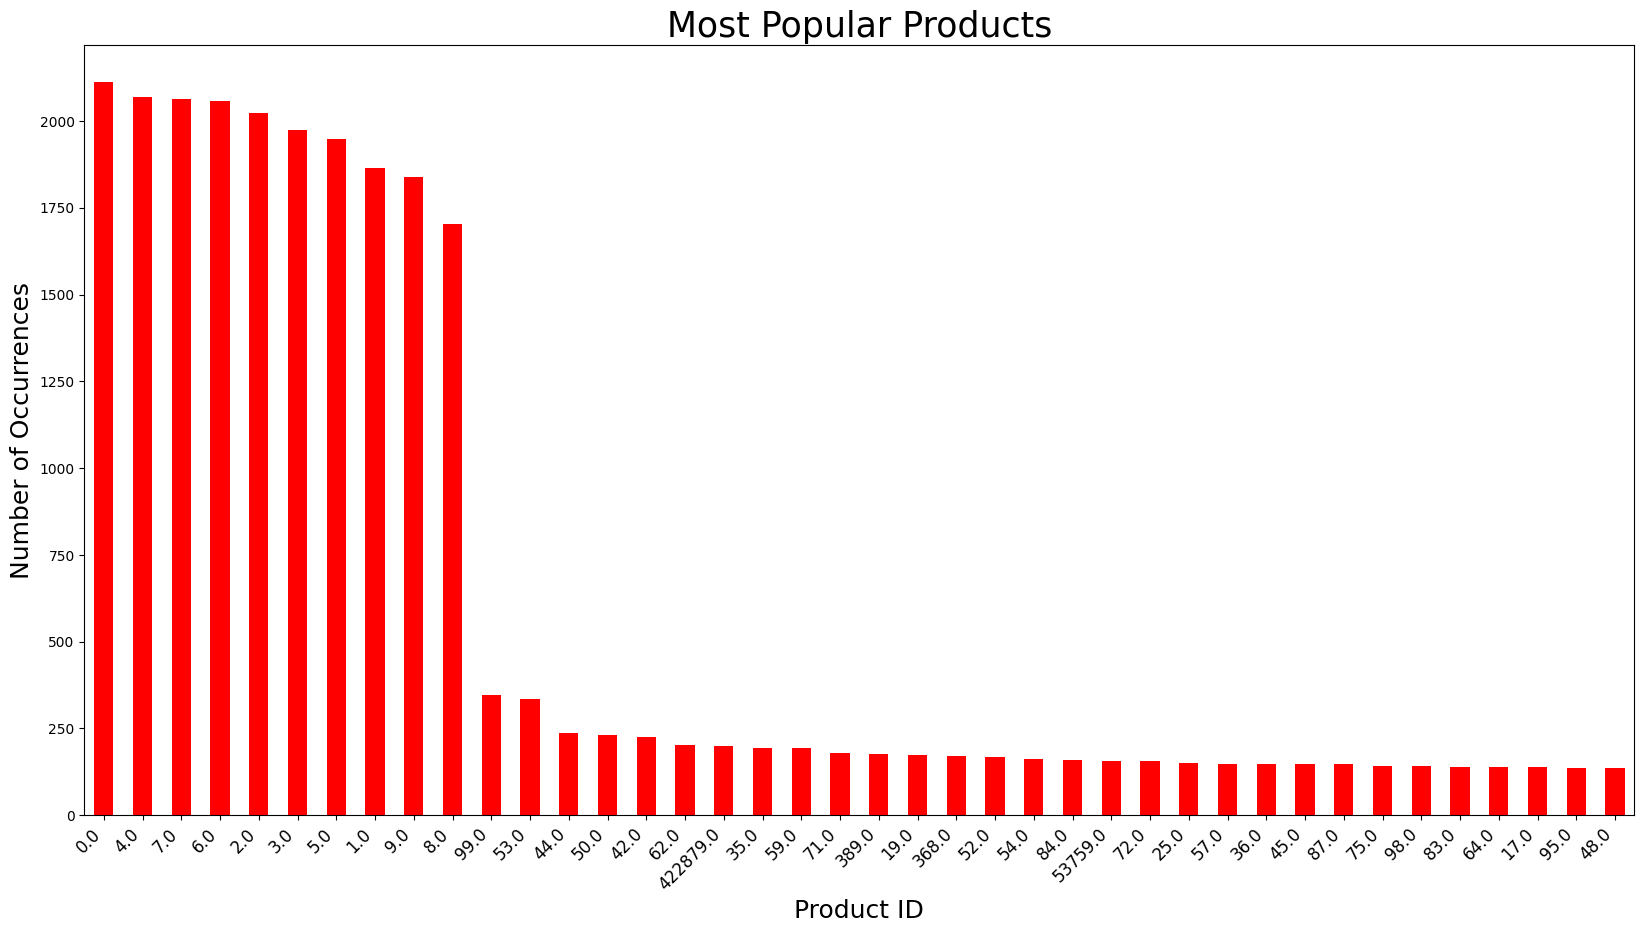

In [110]:
# Top 50 Popular Products based on
plt.figure(figsize=(20,10))
pop = df['product_id'].value_counts().head(40)
pop.plot(kind='bar' , color='red')
plt.title('Most Popular Products' , size=25)
plt.xlabel('Product ID' , size=18)
plt.ylabel('Number of Occurrences' , size=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

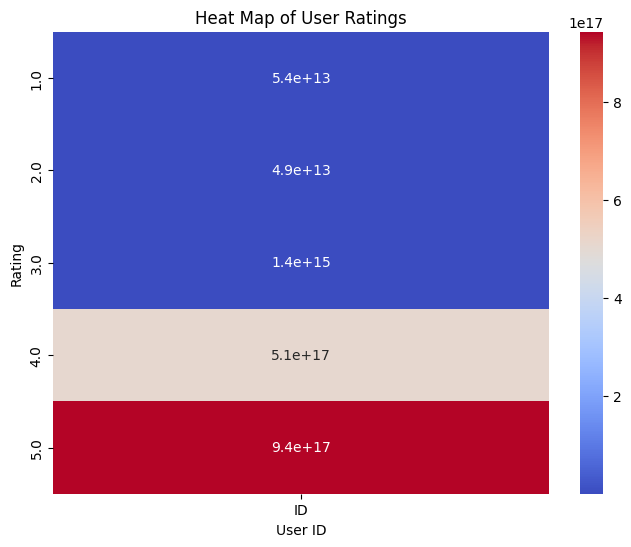

In [111]:
heat_data = df.pivot_table('ID' , 'Rating')

plt.figure(figsize=(8,6))
sns.heatmap(heat_data , annot=True , cmap='coolwarm')
plt.title("Heat Map of User Ratings")
plt.xlabel("Ratings")
plt.xlabel("User ID")
plt.show()

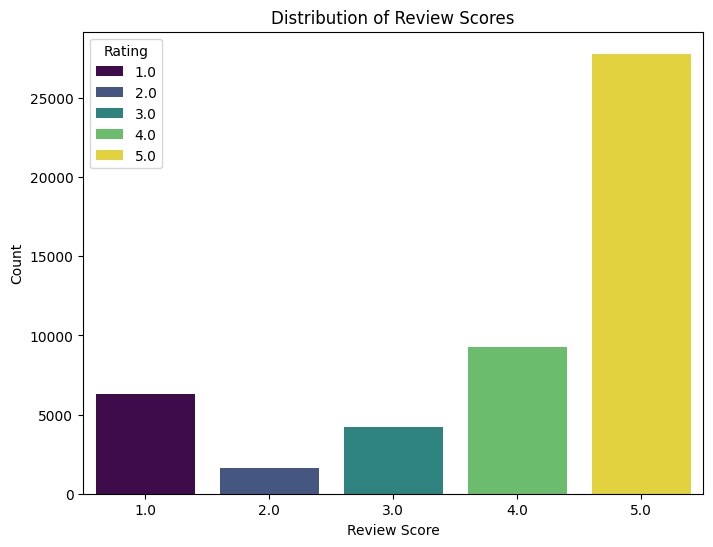

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, palette='viridis', hue='Rating', legend=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

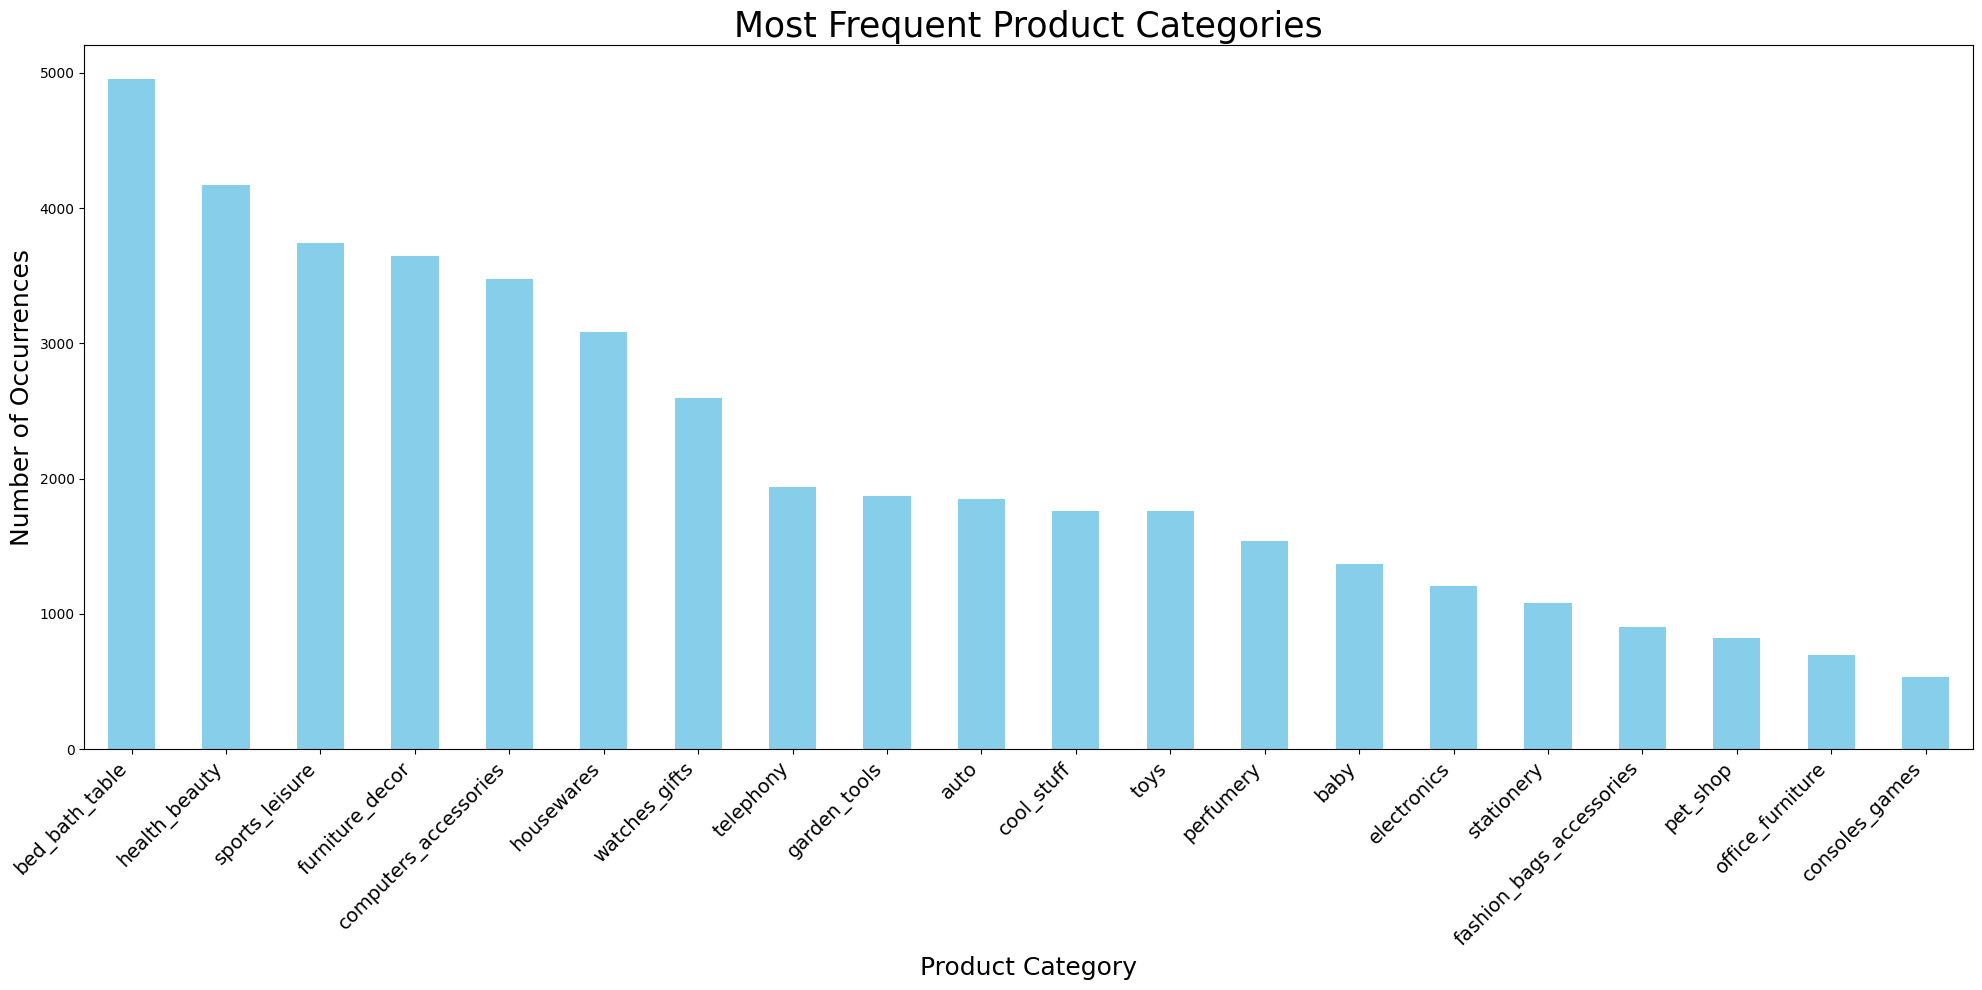

In [113]:
plt.figure(figsize=(20, 10))
category_counts = df['Prod_Category'].value_counts().head(20)
category_counts.plot(kind='bar', color='skyblue')
plt.title('Most Frequent Product Categories' , size=25)
plt.xlabel('Product Category' , size=18)
plt.ylabel('Number of Occurrences' , size=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.tight_layout()
plt.show()

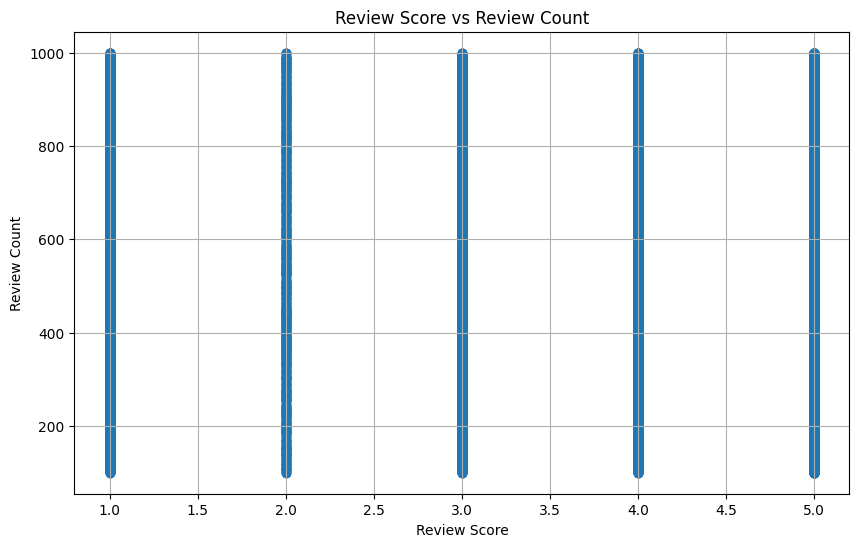

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['ReviewCount'], alpha=0.5)
plt.title('Review Score vs Review Count')
plt.xlabel('Review Score')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

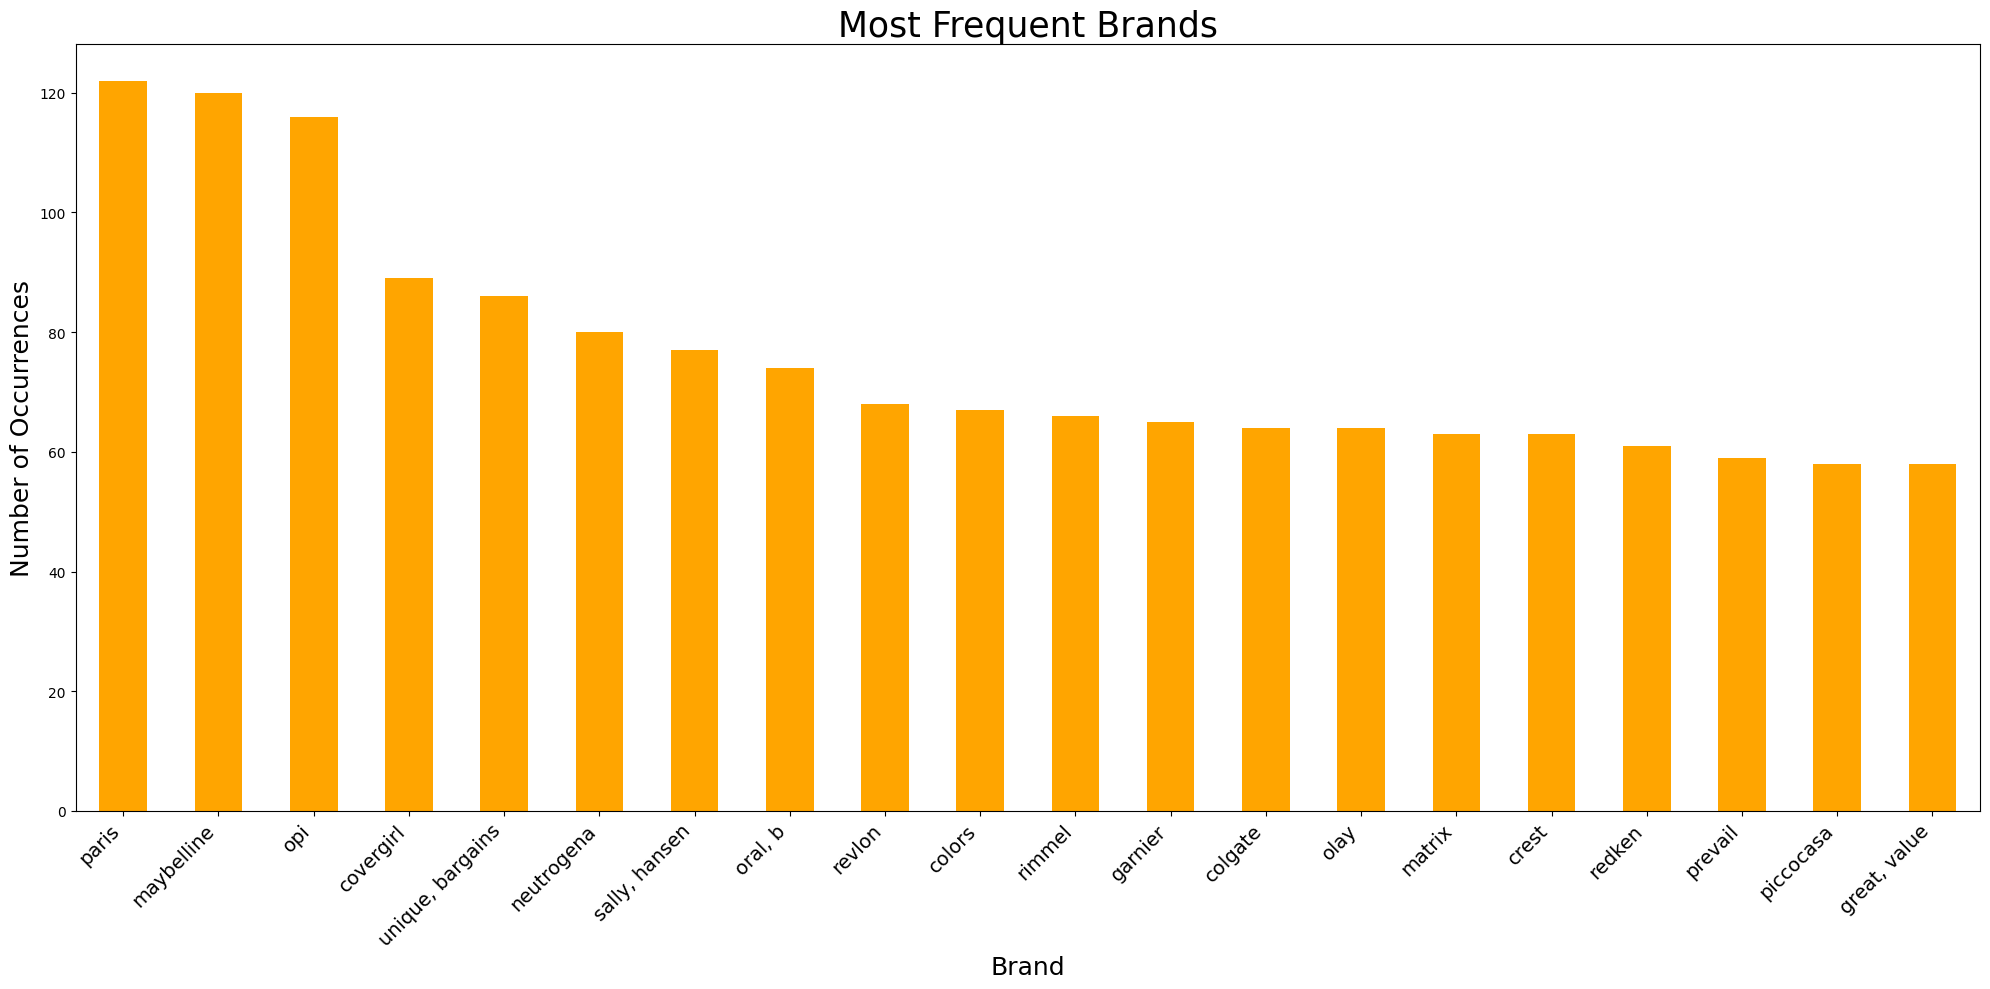

In [115]:
plt.figure(figsize=(20, 10))
brand_counts = df['Brand'].value_counts().head(20)
brand_counts.plot(kind='bar', color='orange')
plt.title('Most Frequent Brands' , size=25)
plt.xlabel('Brand' , size=18)
plt.ylabel('Number of Occurrences' , size=18)
plt.xticks(rotation=45, ha='right' , fontsize=14)
plt.tight_layout()
plt.show()

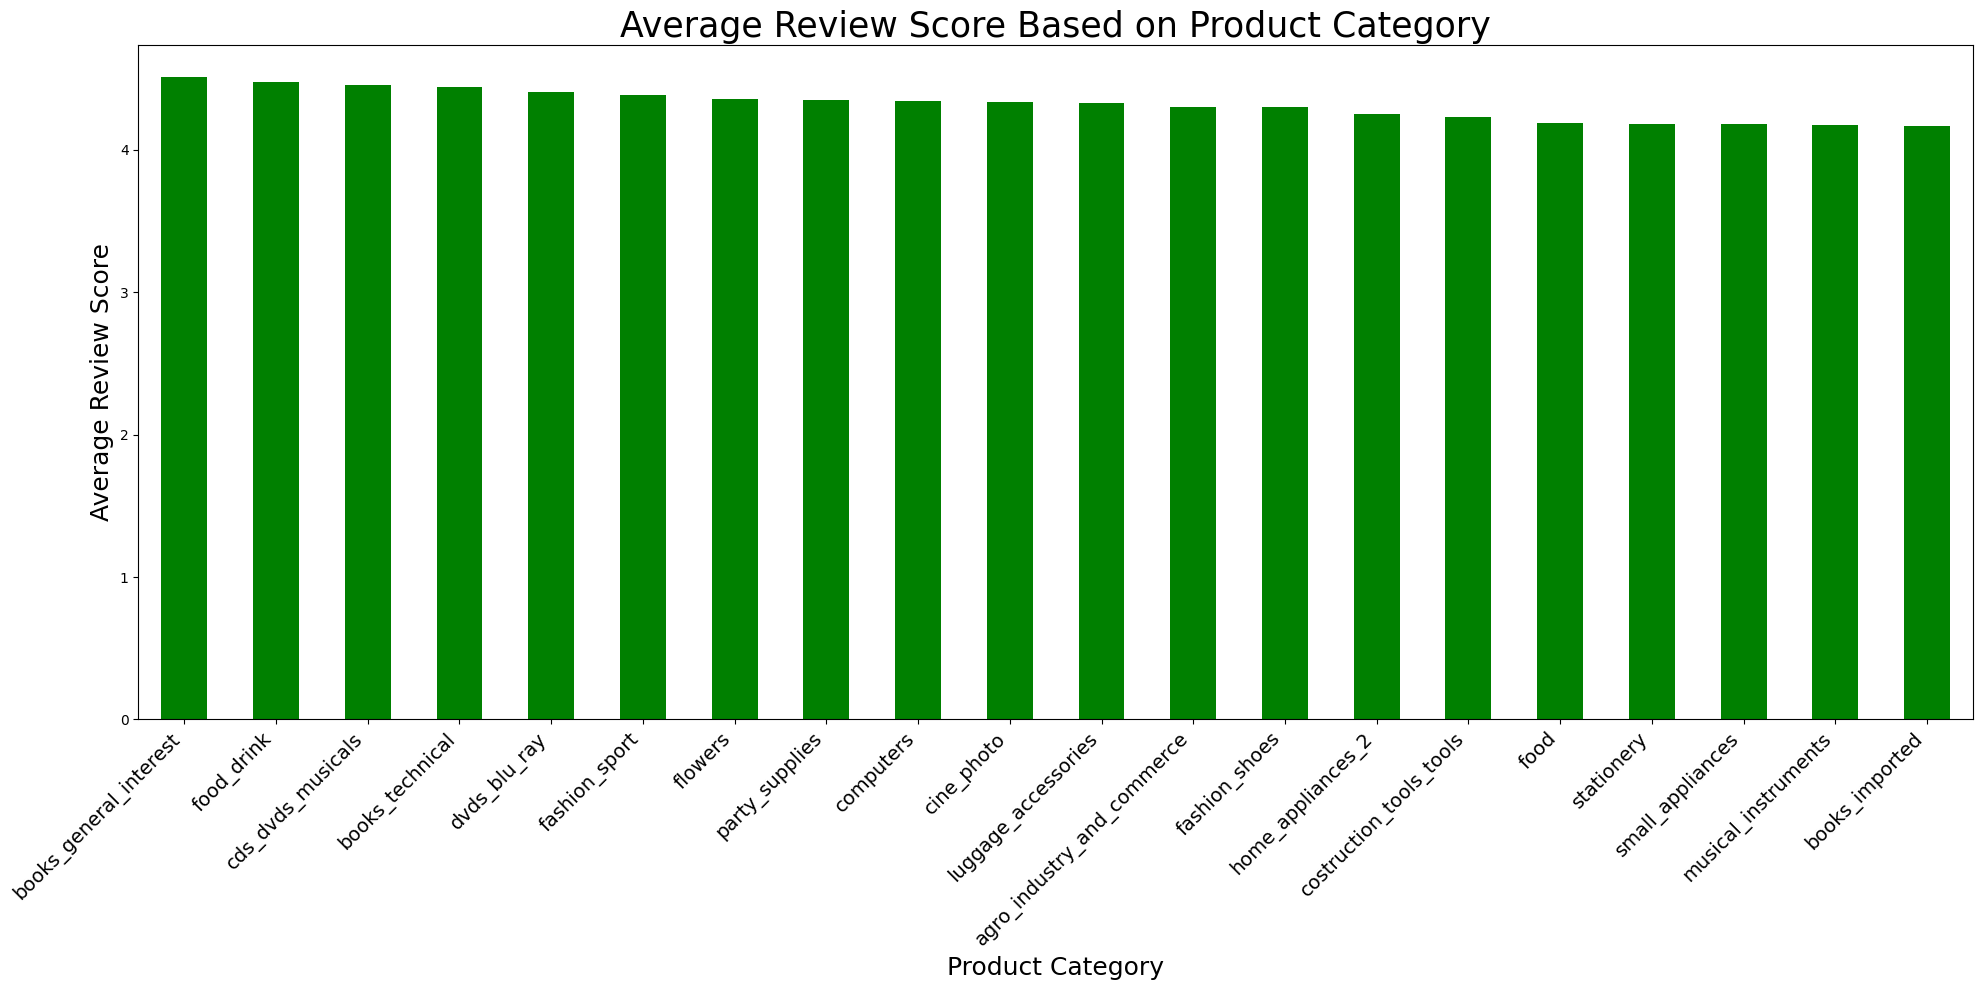

In [116]:
average_review_scores = df.groupby('Prod_Category')['Rating'].mean().sort_values(ascending=False)
top_20_categories = average_review_scores.head(20)

plt.figure(figsize=(20, 10))
top_20_categories.plot(kind='bar', color='Green')
plt.title('Average Review Score Based on Product Category' , size=25)
plt.xlabel('Product Category' , size=18)
plt.ylabel('Average Review Score' , size=18)
plt.xticks(rotation=45, ha='right' , fontsize=14)
plt.tight_layout()
plt.show()

# ***Prepare Data for ML Model***


In [117]:
# Select relevant columns for collaborative filtering
ml_data = df[['ID', 'product_id', 'Rating']].copy()

# Display the first few rows
display(ml_data.tail())

# Get information about the dataframe
ml_data.shape


,ID,product_id,Rating
49995,669.0,7.0,4.0
49996,2.0,1378.0,5.0
49997,76.0,0.0,5.0
49998,76.0,0.0,5.0
49999,1.0,2.0,2.0


(49246, 3)

## Install Libraries and create train , test data

In [118]:
# Now try importing surprise and loading the data again
import surprise
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Define the format with Reader
reader = Reader(rating_scale=(1, 5))

# Load the data from the pandas DataFrame
data = Dataset.load_from_df(ml_data[['ID', 'product_id', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [119]:
print(f"Number of users in the trainset: {trainset.n_users}")
print(f"Number of items in the trainset: {trainset.n_items}")

Number of users in the trainset: 8320
Number of items in the trainset: 4529


# ***Choose Multiple ML Models***

In [120]:
from surprise import SVD, NMF, BaselineOnly, KNNBasic , accuracy

In [121]:
models = {
    'SVD': SVD(),
    'NMF': NMF(),
    'BaselineOnly': BaselineOnly(),
    'KNNBasic': KNNBasic()
}

results = {}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(trainset)
    # Make predictions on the test set
    predictions = model.test(testset)
    # Calculate RMSE and MAE
    rmse = accuracy.rmse(predictions, verbose=False)
    mae = accuracy.mae(predictions, verbose=False)
    results[name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Training and evaluating SVD...
SVD - RMSE: 1.3363, MAE: 1.0379
Training and evaluating NMF...
NMF - RMSE: 1.3788, MAE: 1.0597
Training and evaluating BaselineOnly...
Estimating biases using als...
BaselineOnly - RMSE: 1.3709, MAE: 1.0930
Training and evaluating KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
KNNBasic - RMSE: 1.3655, MAE: 1.0122


## Compare Model Performance

Model Performance Comparison:
SVD:
  RMSE: 1.3363
  MAE: 1.0379
NMF:
  RMSE: 1.3788
  MAE: 1.0597
BaselineOnly:
  RMSE: 1.3709
  MAE: 1.0930
KNNBasic:
  RMSE: 1.3655
  MAE: 1.0122


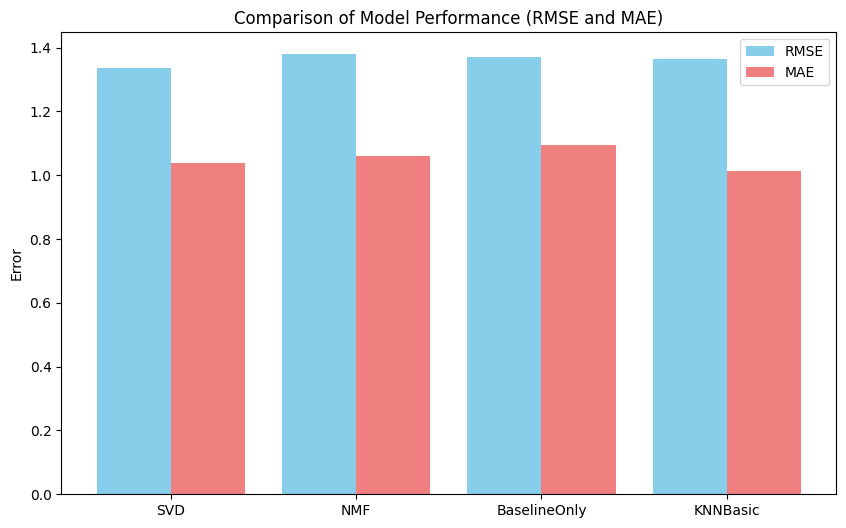

In [122]:
# Display the performance results
print("Model Performance Comparison:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")

# You can also visualize the results
import matplotlib.pyplot as plt

model_names = list(results.keys())
rmse_values = [metrics['RMSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]

x = range(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values, width=0.4, label='RMSE', color='skyblue')
plt.bar([i + 0.4 for i in x], mae_values, width=0.4, label='MAE', color='lightcoral')
plt.xticks([i + 0.2 for i in x], model_names)
plt.ylabel('Error')
plt.title('Comparison of Model Performance (RMSE and MAE)')
plt.legend()
plt.show()

# ***Generate Recommendations***

In [123]:
from collections import defaultdict

def get_top_n_recommendations(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm or generated by predict.

        n(int): The number of recommendation to output for each user. Default
            is 10.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k top ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Choose the best performing model (based on RMSE in this case)
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = models[best_model_name]

print(f"Using the best performing model: {best_model_name}")

# Get recommendations for a sample user using the best model
# Select a random sample user ID from the data
sample_user_id = np.random.choice(ml_data['ID'].unique())

# Get all product IDs that the sample user has not rated yet
all_product_ids = ml_data['product_id'].unique()
rated_product_ids = ml_data[ml_data['ID'] == sample_user_id]['product_id'].unique()
unrated_product_ids = [product_id for product_id in all_product_ids if product_id not in rated_product_ids]

# Predict ratings for the unrated products for the sample user
predictions_for_sample_user = [best_model.predict(sample_user_id, product_id) for product_id in unrated_product_ids]

# Get the top N recommendations for the sample user
top_n_recommendations_best_model = get_top_n_recommendations(predictions_for_sample_user, n=10)

# Print the recommended items
print(f"\nTop 10 recommendations for user {sample_user_id} using {best_model_name}:")
if sample_user_id in top_n_recommendations_best_model:
    for product_id, estimated_rating in top_n_recommendations_best_model[sample_user_id]:
        print(f"  Product ID: {product_id}, Estimated Rating: {estimated_rating:.2f}")
else:
    print(f"  No recommendations found for user {sample_user_id}.")

Using the best performing model: SVD

Top 10 recommendations for user 8922.0 using SVD:
  Product ID: 73326828.0, Estimated Rating: 4.71
  Product ID: 363218.0, Estimated Rating: 4.68
  Product ID: 130482.0, Estimated Rating: 4.65
  Product ID: 3291.0, Estimated Rating: 4.61
  Product ID: 2722.0, Estimated Rating: 4.60
  Product ID: 2067.0, Estimated Rating: 4.59
  Product ID: 574597.0, Estimated Rating: 4.59
  Product ID: 7686.0, Estimated Rating: 4.58
  Product ID: 55782.0, Estimated Rating: 4.56
  Product ID: 242.0, Estimated Rating: 4.55


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Keep the TfidfVectorizer and tfidf_matrix_content creation outside the function
# if the dataframe doesn't change frequently, to avoid recomputing every time.
# However, for demonstration purposes within a function call, we'll keep it here.
# We will initialize the vectorizer outside the function if the dataframe is loaded.
tfidf_vectorizer = None
tfidf_matrix_content = None

def initialize_vectorizer(df):
    """Initializes the TF-IDF vectorizer and matrix."""
    global tfidf_vectorizer, tfidf_matrix_content
    if df is not None and not df.empty:
        # Combine relevant text columns for TF-IDF vectorization
        # Giving more weight to 'Name' and 'Brand' by repeating them
        df['combined_text'] = df['Prod_Category'].fillna('') + (' ' + df['Brand'].fillna(''))*3 + (' ' + df['Name'].fillna(''))*3 + ' ' + \
                              df['Description'].fillna('') + ' ' + \
                              df['Tags'].fillna('')

        tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['combined_text'])
        print("TF-IDF vectorizer and matrix initialized using combined text with weighted fields.")
        print(f"Shape of TF-IDF matrix: {tfidf_matrix_content.shape}")
    else:
        print("Cannot initialize TF-IDF vectorizer: DataFrame is empty.")


def Content_Base_Recomendation(df , search_term , top_n=10):
  print(f"Search term: '{search_term}'")
  if df is None or df.empty:
      print("Error: DataFrame is empty.")
      return pd.DataFrame()

  global tfidf_vectorizer, tfidf_matrix_content
  # Ensure vectorizer and matrix are initialized
  if tfidf_vectorizer is None or tfidf_matrix_content is None:
      initialize_vectorizer(df)
      # If still not initialized, return empty DataFrame
      if tfidf_vectorizer is None or tfidf_matrix_content is None:
          return pd.DataFrame()


  # Vectorize the search term using the *fitted* vectorizer
  search_vector = tfidf_vectorizer.transform([search_term])
  print(f"Shape of search vector: {search_vector.shape}")


  # Calculate cosine similarity between the search term vector and all product tag vectors
  cos_sim = cosine_similarity(search_vector, tfidf_matrix_content)
  print(f"Shape of cosine similarity matrix: {cos_sim.shape}")

  # Get the similarity scores for the search term
  similar_items = list(enumerate(cos_sim[0]))
  print(f"Number of similar items initially: {len(similar_items)}")


  # Sort the predictions and retrieve the k top ones.
  similar_items = sorted(similar_items , key=lambda x:x[1], reverse=True)
  print(f"Top {top_n} similar items (index, score): {similar_items[:top_n]}")


  # Exclude items with 0.0 similarity and take the top_n
  Top_similar_items = [item for item in similar_items if item[1] > 0.0][:top_n]


  recomended_indexes = [x[0] for x in Top_similar_items]
  print(f"Recommended indexes: {recomended_indexes}")

  if not recomended_indexes:
      print("No items found with similarity score greater than 0.0.")
      return pd.DataFrame()

  # Ensure recommended_indexes are within the valid range of the dataframe index
  valid_recomended_indexes = [idx for idx in recomended_indexes if idx < len(df)]
  print(f"Valid recommended indexes: {valid_recomended_indexes}")

  if not valid_recomended_indexes:
      print("No valid recommended indexes found within DataFrame bounds after filtering.")
      return pd.DataFrame()


  recomended_items = df.iloc[valid_recomended_indexes][['Name' , 'Brand' , 'ReviewCount' , 'Rating']]
  print(f"Shape of recommended items DataFrame: {recomended_items.shape}")


  return recomended_items

# You may need to call initialize_vectorizer(df) after loading your dataframe
# For example, after cell PmU1dXg-LcP8

## ***Search based on list of Items***

In [125]:
def initialize_vectorizer(df, ngram_range=(1, 1), min_df=0.001, max_df=0.999):
    """Initializes the TF-IDF vectorizer and matrix."""
    global tfidf_vectorizer, tfidf_matrix_content
    if df is not None and not df.empty:
        # Combine relevant text columns for TF-IDF vectorization
        df['combined_text'] = df['Prod_Category'].fillna('') + (' ' + df['Brand'].fillna(''))*3 + (' ' + df['Name'].fillna(''))*3 + ' ' + \
                              df['Description'].fillna('') + ' ' + \
                              df['Tags'].fillna('')

        tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=ngram_range, min_df=min_df, max_df=max_df)
        tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['combined_text'])
        print(f"TF-IDF vectorizer and matrix initialized using combined text with weighted fields and ngram_range={ngram_range}.")
        print(f"Shape of TF-IDF matrix: {tfidf_matrix_content.shape}")
    else:
        print("Cannot initialize TF-IDF vectorizer: DataFrame is empty.")

# Re-initialize with n-grams (e.g., unigrams and bigrams) and previously found good min_df/max_df

In [126]:
from surprise import Prediction
from collections import defaultdict

def hybrid_recommendations(user_id, search_term=None, cf_model=None, cb_function=None, dataframe=None, history_threshold=5, top_n=10):
    # Ensure TF-IDF vectorizer and matrix are initialized before potentially using CB
    global tfidf_vectorizer, tfidf_matrix_content
    if tfidf_vectorizer is None or tfidf_matrix_content is None:
        print("TF-IDF vectorizer and matrix not initialized. Initializing now.")
        initialize_vectorizer(dataframe) # Pass the dataframe to the initialization

    # Check if the user is in the CF training set
    user_rated_items = dataframe[dataframe['ID'] == user_id]

    if len(user_rated_items) >= history_threshold and cf_model:
        print(f"User {user_id} is a CF user.")
        # Collaborative Filtering approach
        if search_term is not None and cb_function is not None:
            print(f"Using hybrid approach for CF user with search term '{search_term}'.")
            # Hybrid: CF + CB based on a search term
            cb_recs = cb_function(dataframe, search_term, top_n=top_n * 2) # Pass the dataframe to CB function
            if not cb_recs.empty:
                # Get CF predictions for the content-based recommended items
                cb_item_ids = []
                for index, row in cb_recs.iterrows():
                    # Find the product_id in the original dataframe based on Name and Brand
                    matching_items = dataframe[(dataframe['Name'] == row['Name']) & (dataframe['Brand'] == row['Brand'])]
                    if not matching_items.empty:
                        cb_item_ids.append(matching_items.iloc[0]['product_id'])

                cf_predictions = [cf_model.predict(user_id, iid) for iid in cb_item_ids if not pd.isna(iid)] # Filter out NaN product_ids
                # Combine scores (simple weighted average or just use CF score if available)
                # For simplicity, we'll just use the estimated CF rating if available
                recommended_items = []
                for pred in cf_predictions:
                     # Check if the item_id from prediction exists in the dataframe
                    if pred.iid in dataframe['product_id'].values:
                        item_details = dataframe[dataframe['product_id'] == pred.iid].iloc[0]
                        recommended_items.append({
                            'Name': item_details['Name'],
                            'Brand': item_details['Brand'],
                            'ReviewCount': item_details['ReviewCount'],
                            'Rating': pred.est # Use the estimated rating from CF
                        })
                recommended_df = pd.DataFrame(recommended_items)
                # Sort by estimated rating and return top N
                return recommended_df.sort_values(by='Rating', ascending=False).head(top_n)
            else:
                print("No content-based recommendations found for the search term.")
                return pd.DataFrame()
        else:
            print(f"Using CF approach for user {user_id} (no search term specified).")
            # Pure Collaborative Filtering
            # Get a list of all product IDs
            all_product_ids = dataframe['product_id'].unique()
            # Get a list of product IDs rated by the user
            rated_product_ids = user_rated_items['product_id'].unique()
            # Get a list of product IDs not rated by the user
            unrated_product_ids = [pid for pid in all_product_ids if pid not in rated_product_ids and not pd.isna(pid)] # Filter out NaN product_ids

            # Predict ratings for unrated items
            predictions = [cf_model.predict(user_id, iid) for iid in unrated_product_ids]

            # Get the top N recommendations based on predicted ratings
            top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

            recommended_items = []
            for pred in top_predictions:
                 # Check if the item_id from prediction exists in the dataframe
                if pred.iid in dataframe['product_id'].values:
                    item_details = dataframe[dataframe['product_id'] == pred.iid].iloc[0]
                    recommended_items.append({
                        'Name': item_details['Name'],
                        'Brand': item_details['Brand'],
                        'ReviewCount': item_details['ReviewCount'],
                        'Rating': pred.est # Use the estimated rating from CF
                    })
            return pd.DataFrame(recommended_items)

    elif search_term is not None and cb_function is not None:
        print(f"User {user_id} is a cold-start user or has few ratings. Using content-based approach with search term '{search_term}'.")
        # Cold Start user: Content-Based approach based on a search term
        return cb_function(dataframe, search_term, top_n=top_n) # Pass the dataframe to CB function

    else:
        print(f"Cannot generate recommendations for user {user_id}. User has few ratings and no search term was provided.")
        return pd.DataFrame()

In [127]:

# Define different min_df and max_df value combinations to experiment with
param_combinations = [
    (0.01, 0.99),
    (0.05, 0.95),
    (0.001, 0.999), #Giving Best Outputs
    (0.005, 0.995),
    (0.01, 0.95),
    (0.05, 0.99)
]

# Create a loop that iterates through the defined combinations
for min_df_val, max_df_val in param_combinations:
    print(f"\n--- Trying min_df={min_df_val}, max_df={max_df_val} ---")

    # Re-initialize the TfidfVectorizer with the current min_df and max_df values
    # and fit it to the combined_text column
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=min_df_val, max_df=max_df_val)
    df['combined_text'] = df['Prod_Category'].fillna('') + (' ' + df['Brand'].fillna(''))*3 + (' ' + df['Name'].fillna(''))*3 + ' ' + \
                          df['Description'].fillna('') + ' ' + \
                          df['Tags'].fillna('')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['combined_text'])
    print(f"TF-IDF matrix shape for this combination: {tfidf_matrix_content.shape}")

    # Define a few sample search terms for evaluation
    sample_search_terms = [
        "Xiaomi",
        "laptop",
        "makeup",
        "sports shoe",
        "furniture",
        "electronics",
        "baby products",
    ]

    # For each combination, generate content-based recommendations for sample search terms
    for term in sample_search_terms:
        print(f"\nRecommendations for search term: '{term}'")
        recommendations = Content_Base_Recomendation(df, term, top_n=5) # Get top 5 for brevity
        if not recommendations.empty:
            display(recommendations)
        else:
            print("No recommendations found for this search term and parameter combination.")


--- Trying min_df=0.01, max_df=0.99 ---
TF-IDF matrix shape for this combination: (49246, 2326)

Recommendations for search term: 'Xiaomi'
Search term: 'Xiaomi'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'laptop'
Search term: 'laptop'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'makeup'
Search ter

,Name,Brand,ReviewCount,Rating
45888,MAYBELLINE,"eveline, cosmetics",859.0,4.0
1748,"Neutrogena Oil-Free Liquid Eye Makeup Remover,...",neutrogena,739.0,5.0
9449,"Dr Wheatgrass Antioxidant Skin Recovery Spray,...",eminence,269.0,5.0
47864,(2 pack) Gillette Fusion Ultra Sensitive Hydra...,renuzit,381.0,5.0
21127,Barbasol Beard Buster Shaving Cream Soothing A...,sts,407.0,1.0



Recommendations for search term: 'sports shoe'
Search term: 'sports shoe'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(10423, 0.39506709688951513), (7086, 0.35304578988279584), (40888, 0.3290910555317243), (12637, 0.32770437169013955), (3780, 0.3224281027555254)]
Recommended indexes: [10423, 7086, 40888, 12637, 3780]
Valid recommended indexes: [10423, 7086, 40888, 12637, 3780]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
10600,(2 Pack) Suave Men Alpine Fresh 2 in 1 Shampoo...,"bpi, sports",584.0,5.0
7195,"Sports Research Sweet Sweat Workout Enhancer, ...","baxter, california",388.0,4.0
41502,"Vitamin E Beauty 14,000 IU Skin Oil 1 oz",yosoo,885.0,1.0
12847,"Sports Research Sweet Sweat Workout Enhancer, ...","ruby, kisses",875.0,3.0
3839,"Sports Research Sweet Sweat Workout Enhancer, ...","sports, research",348.0,4.0



Recommendations for search term: 'furniture'
Search term: 'furniture'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(24209, 0.42952422836356896), (9889, 0.3916147595930995), (2893, 0.3145817285616143), (21852, 0.29301129060649006), (3293, 0.29286593880439393)]
Recommended indexes: [24209, 9889, 2893, 21852, 3293]
Valid recommended indexes: [24209, 9889, 2893, 21852, 3293]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
24572,3 Pcs Natural Wood Seasoning Beeswax Furniture...,rampro,683.0,5.0
10050,3 Pcs Natural Wood Seasoning Beeswax Furniture...,timemist,417.0,5.0
2943,Blue Jay Absorb n Protect Incontinent Chair Pa...,"blue, jay, elite, healthcare, brand",398.0,5.0
22193,"Genuine Joe, GJO58143, Heavy-duty Metal Dustpa...",nyc,406.0,5.0
3345,Prevail Fluff Super Absorbency Incontinence Un...,prevail,483.0,5.0



Recommendations for search term: 'electronics'
Search term: 'electronics'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(25845, 0.22111908906535893), (38148, 0.19475564647059013), (304, 0.18840345506944706), (45242, 0.17653454166382218), (1171, 0.17206319379948923)]
Recommended indexes: [25845, 38148, 304, 45242, 1171]
Valid recommended indexes: [25845, 38148, 304, 45242, 1171]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
26222,"Le Male All-Over Shower Gel, 6.8 Oz",ecogecko,815.0,1.0
38714,Scotch-Brite 3PK Dobie Cleaning Pad,wunder2,304.0,5.0
309,OROFLUIDO - Beauty Elixir 3.3oz,orofluido,522.0,1.0
45940,Kerastase Resistance Fondant Extentioniste Con...,kaboom,884.0,5.0
1196,Compagnie de Provence Savon de Marseille Extra...,"compagnie, de, provence",384.0,5.0



Recommendations for search term: 'baby products'
Search term: 'baby products'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(48171, 0.5304594058643415), (6501, 0.44143527337972494), (864, 0.44129476157066355), (28110, 0.436800993647731), (1260, 0.4358957842855897)]
Recommended indexes: [48171, 6501, 864, 28110, 1260]
Valid recommended indexes: [48171, 6501, 864, 28110, 1260]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
48912,"Aquaphor Baby Healing Ointment, Baby Skin Care...",burberry,830.0,5.0
6608,Biolage Color Care Acidic Conditioner Rinse - ...,gmyle,557.0,5.0
881,Johnsons CottonTouch Newborn Baby Wash & Shamp...,johnson,461.0,5.0
28535,Nicesee Baby Soft Silicone Finger Toothbrush,firefly,984.0,3.0
1287,Johnsons Baby Soap Bar Gentle for Baby Bath an...,johnson,231.0,5.0



--- Trying min_df=0.05, max_df=0.95 ---
TF-IDF matrix shape for this combination: (49246, 474)

Recommendations for search term: 'Xiaomi'
Search term: 'Xiaomi'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'laptop'
Search term: 'laptop'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'makeup'
Search term: 

,Name,Brand,ReviewCount,Rating
41001,"CoverGirl Aqua Smoothers Liquid Makeup, Classi...",eltamd,655.0,5.0
45888,MAYBELLINE,"eveline, cosmetics",859.0,4.0
837,"LOreal Paris Brow Stylist Frame and Set, Deep ...",paris,857.0,5.0
1748,"Neutrogena Oil-Free Liquid Eye Makeup Remover,...",neutrogena,739.0,5.0
164,Covergirl Lash Exact Waterproof Mascara,covergirl,463.0,5.0



Recommendations for search term: 'sports shoe'
Search term: 'sports shoe'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'furniture'
Search term: 'furniture'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'electronics'
Search term: 'electronics'
Shape of search vector: (1, 474)
Shape of cosine similarity m

,Name,Brand,ReviewCount,Rating
31547,Tranquility Cooling Cover for Weighted Blanket,"nutra, sx",903.0,3.0
1810,Seventh Generation Baby Wipes with Dispenser F...,"seventh, generation",291.0,5.0
47031,Bigen Semi Permanent Hair Color #AB3 Medium As...,cnd,120.0,1.0
45340,OROFLUIDO - Beauty Elixir 3.3oz,"baxter, california",999.0,5.0
4464,Baja Blanket Car Seat Covers Set Universal Aut...,ddrops,901.0,5.0



--- Trying min_df=0.001, max_df=0.999 ---
TF-IDF matrix shape for this combination: (49246, 10195)

Recommendations for search term: 'Xiaomi'
Search term: 'Xiaomi'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(3799, 0.5790899521559597), (13252, 0.40648045299698604), (2728, 0.394326325846078), (8836, 0.3577394470199956), (32734, 0.3038678699449491)]
Recommended indexes: [3799, 13252, 2728, 8836, 32734]
Valid recommended indexes: [3799, 13252, 2728, 8836, 32734]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
3858,Lemon Fragrance Tablet For Xiaomi Guildford Ai...,xiaomi,954.0,5.0
13482,Andalou Naturals Kukui Cocoa Nourishing Body B...,xiaomi,278.0,4.0
2776,Xiaomi ENHCEN Electric Hair Clipper Set Quiet ...,xiaomi,462.0,5.0
8976,RxCleanse Moisturizing Hand Sanitizer 16 oz - ...,xiaomi,903.0,5.0
33227,Neutrogena Healthy Skin Anti-Wrinkle With Suns...,"bedside, care",720.0,5.0



Recommendations for search term: 'laptop'
Search term: 'laptop'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(40568, 0.0777023880763069), (31778, 0.0763100685414719), (2877, 0.0752821130093912), (19204, 0.0751320063223476), (37690, 0.07406923812660436)]
Recommended indexes: [40568, 31778, 2877, 19204, 37690]
Valid recommended indexes: [40568, 31778, 2877, 19204, 37690]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
41177,SuperStay 24Ã‚Â Liquid Lipstick,redken,706.0,4.0
32258,"Maybelline Color Sensational The Creams, Cream...","black, radiance",185.0,5.0
2927,"Hair Clippers for Men,Hair Trimmer Set Cordles...",qd,712.0,5.0
19514,KMS California Moist Repair Leave-In Condition...,dior,484.0,5.0
38250,Gillette Clinical Soft Solid Sport Triumph Ant...,clarins,604.0,4.0



Recommendations for search term: 'makeup'
Search term: 'makeup'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(1710, 0.4533660346367011), (45190, 0.4325989539452496), (9298, 0.38459152911322775), (20797, 0.38087068648541256), (15625, 0.37938291861970586)]
Recommended indexes: [1710, 45190, 9298, 20797, 15625]
Valid recommended indexes: [1710, 45190, 9298, 20797, 15625]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
1748,"Neutrogena Oil-Free Liquid Eye Makeup Remover,...",neutrogena,739.0,5.0
45888,MAYBELLINE,"eveline, cosmetics",859.0,4.0
9449,"Dr Wheatgrass Antioxidant Skin Recovery Spray,...",eminence,269.0,5.0
21127,Barbasol Beard Buster Shaving Cream Soothing A...,sts,407.0,1.0
15892,P&G Oral-B Floss Action 8-Pack Replacement Bru...,dixie,306.0,5.0



Recommendations for search term: 'sports shoe'
Search term: 'sports shoe'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(6706, 0.40339445811149355), (1344, 0.3969159913130932), (20964, 0.39588176794642527), (12065, 0.3859966429283203), (41516, 0.38456552027702257)]
Recommended indexes: [6706, 1344, 20964, 12065, 41516]
Valid recommended indexes: [6706, 1344, 20964, 12065, 41516]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
6814,Rum Hand and Body Wash by Malin + Goetz for Un...,"bronner, bros",767.0,5.0
1373,Elegant Choise 2 Pairs Sneaker Care Shoes Prot...,"elegant, choise",686.0,5.0
21295,(2 pack) Nexxus humectress for normal to dry h...,"philips, norelco",834.0,5.0
12263,Chinatown 24/7 Body Silk by Bond No. 9 for Wom...,edgelook,732.0,3.0
42146,"Rimmel The Only 1 Matte Lipstick, Leader of Th...","art, shaving",261.0,1.0



Recommendations for search term: 'furniture'
Search term: 'furniture'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(24209, 0.32129649831096896), (9889, 0.29505790697837814), (2893, 0.23525165099471657), (3293, 0.23521961042823683), (25953, 0.22560488946761986)]
Recommended indexes: [24209, 9889, 2893, 3293, 25953]
Valid recommended indexes: [24209, 9889, 2893, 3293, 25953]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
24572,3 Pcs Natural Wood Seasoning Beeswax Furniture...,rampro,683.0,5.0
10050,3 Pcs Natural Wood Seasoning Beeswax Furniture...,timemist,417.0,5.0
2943,Blue Jay Absorb n Protect Incontinent Chair Pa...,"blue, jay, elite, healthcare, brand",398.0,5.0
3345,Prevail Fluff Super Absorbency Incontinence Un...,prevail,483.0,5.0
26333,Orange Glo 2-In-1 Clean & Polish Orange Scent ...,"adjust, heel",825.0,4.0



Recommendations for search term: 'electronics'
Search term: 'electronics'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(29883, 0.12006436737810318), (25845, 0.1173402194413579), (26911, 0.1152305424738082), (38148, 0.11140435312553493), (23794, 0.10861013215137388)]
Recommended indexes: [29883, 25845, 26911, 38148, 23794]
Valid recommended indexes: [29883, 25845, 26911, 38148, 23794]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
30339,Yankee Candle Co 1.5oz Goodair Room Spray 1348276,natural,484.0,4.0
26222,"Le Male All-Over Shower Gel, 6.8 Oz",ecogecko,815.0,1.0
27308,Liken Plant Herbal Scent Nature-Inspired Deodo...,paris,862.0,3.0
38714,Scotch-Brite 3PK Dobie Cleaning Pad,wunder2,304.0,5.0
24153,"Dove Men+Care Extra Fresh Deodorant Stick, 3 o...","spray, n, wash",227.0,5.0



Recommendations for search term: 'baby products'
Search term: 'baby products'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(48171, 0.4308233927417683), (1260, 0.42147117920695576), (18361, 0.3549503214101642), (6501, 0.34884908855866625), (28110, 0.34859221046823063)]
Recommended indexes: [48171, 1260, 18361, 6501, 28110]
Valid recommended indexes: [48171, 1260, 18361, 6501, 28110]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
48912,"Aquaphor Baby Healing Ointment, Baby Skin Care...",burberry,830.0,5.0
1287,Johnsons Baby Soap Bar Gentle for Baby Bath an...,johnson,231.0,5.0
18659,"Jason Pure Natural Body Wash, Calming Lavender...",prosourcefit,683.0,3.0
6608,Biolage Color Care Acidic Conditioner Rinse - ...,gmyle,557.0,5.0
28535,Nicesee Baby Soft Silicone Finger Toothbrush,firefly,984.0,3.0



--- Trying min_df=0.005, max_df=0.995 ---
TF-IDF matrix shape for this combination: (49246, 3868)

Recommendations for search term: 'Xiaomi'
Search term: 'Xiaomi'
Shape of search vector: (1, 3868)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'laptop'
Search term: 'laptop'
Shape of search vector: (1, 3868)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'makeup'
Search t

,Name,Brand,ReviewCount,Rating
1748,"Neutrogena Oil-Free Liquid Eye Makeup Remover,...",neutrogena,739.0,5.0
45888,MAYBELLINE,"eveline, cosmetics",859.0,4.0
9449,"Dr Wheatgrass Antioxidant Skin Recovery Spray,...",eminence,269.0,5.0
21127,Barbasol Beard Buster Shaving Cream Soothing A...,sts,407.0,1.0
15892,P&G Oral-B Floss Action 8-Pack Replacement Bru...,dixie,306.0,5.0



Recommendations for search term: 'sports shoe'
Search term: 'sports shoe'
Shape of search vector: (1, 3868)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(6706, 0.4575695558144589), (32087, 0.448099233921048), (1344, 0.4469588447794902), (20964, 0.44256320648833253), (14353, 0.4424164334355031)]
Recommended indexes: [6706, 32087, 1344, 20964, 14353]
Valid recommended indexes: [6706, 32087, 1344, 20964, 14353]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
6814,Rum Hand and Body Wash by Malin + Goetz for Un...,"bronner, bros",767.0,5.0
32571,Epicuren After Bath Body Moisturizer Fresh Uns...,"dr, linus, pauling",108.0,4.0
1373,Elegant Choise 2 Pairs Sneaker Care Shoes Prot...,"elegant, choise",686.0,5.0
21295,(2 pack) Nexxus humectress for normal to dry h...,"philips, norelco",834.0,5.0
14603,"Febreze Car Odor-Eliminating Air Freshener, Ga...","pierre, la, touche",707.0,5.0



Recommendations for search term: 'furniture'
Search term: 'furniture'
Shape of search vector: (1, 3868)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(24209, 0.3845580934215366), (9889, 0.3410216533724427), (2893, 0.2946994778431551), (25953, 0.27250998714639674), (27052, 0.2671159450020926)]
Recommended indexes: [24209, 9889, 2893, 25953, 27052]
Valid recommended indexes: [24209, 9889, 2893, 25953, 27052]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
24572,3 Pcs Natural Wood Seasoning Beeswax Furniture...,rampro,683.0,5.0
10050,3 Pcs Natural Wood Seasoning Beeswax Furniture...,timemist,417.0,5.0
2943,Blue Jay Absorb n Protect Incontinent Chair Pa...,"blue, jay, elite, healthcare, brand",398.0,5.0
26333,Orange Glo 2-In-1 Clean & Polish Orange Scent ...,"adjust, heel",825.0,4.0
27457,Australian Gold Sunscreen High Strength SPF 15...,"discount, trends",557.0,5.0



Recommendations for search term: 'electronics'
Search term: 'electronics'
Shape of search vector: (1, 3868)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(38148, 0.18920721513165914), (25845, 0.15285448048162462), (3291, 0.15189323321914414), (29883, 0.15050511983266024), (45242, 0.1435933593892719)]
Recommended indexes: [38148, 25845, 3291, 29883, 45242]
Valid recommended indexes: [38148, 25845, 3291, 29883, 45242]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
38714,Scotch-Brite 3PK Dobie Cleaning Pad,wunder2,304.0,5.0
26222,"Le Male All-Over Shower Gel, 6.8 Oz",ecogecko,815.0,1.0
3343,Ralph Lauren Shower Gel 2.5 oz,"ralph, lauren",373.0,4.0
30339,Yankee Candle Co 1.5oz Goodair Room Spray 1348276,natural,484.0,4.0
45940,Kerastase Resistance Fondant Extentioniste Con...,kaboom,884.0,5.0



Recommendations for search term: 'baby products'
Search term: 'baby products'
Shape of search vector: (1, 3868)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(48171, 0.48063691089639676), (864, 0.4366074191861507), (1260, 0.43497047246023146), (28110, 0.43225393085544667), (6501, 0.4288670667533428)]
Recommended indexes: [48171, 864, 1260, 28110, 6501]
Valid recommended indexes: [48171, 864, 1260, 28110, 6501]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
48912,"Aquaphor Baby Healing Ointment, Baby Skin Care...",burberry,830.0,5.0
881,Johnsons CottonTouch Newborn Baby Wash & Shamp...,johnson,461.0,5.0
1287,Johnsons Baby Soap Bar Gentle for Baby Bath an...,johnson,231.0,5.0
28535,Nicesee Baby Soft Silicone Finger Toothbrush,firefly,984.0,3.0
6608,Biolage Color Care Acidic Conditioner Rinse - ...,gmyle,557.0,5.0



--- Trying min_df=0.01, max_df=0.95 ---
TF-IDF matrix shape for this combination: (49246, 2326)

Recommendations for search term: 'Xiaomi'
Search term: 'Xiaomi'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'laptop'
Search term: 'laptop'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'makeup'
Search ter

,Name,Brand,ReviewCount,Rating
45888,MAYBELLINE,"eveline, cosmetics",859.0,4.0
1748,"Neutrogena Oil-Free Liquid Eye Makeup Remover,...",neutrogena,739.0,5.0
9449,"Dr Wheatgrass Antioxidant Skin Recovery Spray,...",eminence,269.0,5.0
47864,(2 pack) Gillette Fusion Ultra Sensitive Hydra...,renuzit,381.0,5.0
21127,Barbasol Beard Buster Shaving Cream Soothing A...,sts,407.0,1.0



Recommendations for search term: 'sports shoe'
Search term: 'sports shoe'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(10423, 0.39506709688951513), (7086, 0.35304578988279584), (40888, 0.3290910555317243), (12637, 0.32770437169013955), (3780, 0.3224281027555254)]
Recommended indexes: [10423, 7086, 40888, 12637, 3780]
Valid recommended indexes: [10423, 7086, 40888, 12637, 3780]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
10600,(2 Pack) Suave Men Alpine Fresh 2 in 1 Shampoo...,"bpi, sports",584.0,5.0
7195,"Sports Research Sweet Sweat Workout Enhancer, ...","baxter, california",388.0,4.0
41502,"Vitamin E Beauty 14,000 IU Skin Oil 1 oz",yosoo,885.0,1.0
12847,"Sports Research Sweet Sweat Workout Enhancer, ...","ruby, kisses",875.0,3.0
3839,"Sports Research Sweet Sweat Workout Enhancer, ...","sports, research",348.0,4.0



Recommendations for search term: 'furniture'
Search term: 'furniture'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(24209, 0.42952422836356896), (9889, 0.3916147595930995), (2893, 0.3145817285616143), (21852, 0.29301129060649006), (3293, 0.29286593880439393)]
Recommended indexes: [24209, 9889, 2893, 21852, 3293]
Valid recommended indexes: [24209, 9889, 2893, 21852, 3293]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
24572,3 Pcs Natural Wood Seasoning Beeswax Furniture...,rampro,683.0,5.0
10050,3 Pcs Natural Wood Seasoning Beeswax Furniture...,timemist,417.0,5.0
2943,Blue Jay Absorb n Protect Incontinent Chair Pa...,"blue, jay, elite, healthcare, brand",398.0,5.0
22193,"Genuine Joe, GJO58143, Heavy-duty Metal Dustpa...",nyc,406.0,5.0
3345,Prevail Fluff Super Absorbency Incontinence Un...,prevail,483.0,5.0



Recommendations for search term: 'electronics'
Search term: 'electronics'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(25845, 0.22111908906535893), (38148, 0.19475564647059013), (304, 0.18840345506944706), (45242, 0.17653454166382218), (1171, 0.17206319379948923)]
Recommended indexes: [25845, 38148, 304, 45242, 1171]
Valid recommended indexes: [25845, 38148, 304, 45242, 1171]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
26222,"Le Male All-Over Shower Gel, 6.8 Oz",ecogecko,815.0,1.0
38714,Scotch-Brite 3PK Dobie Cleaning Pad,wunder2,304.0,5.0
309,OROFLUIDO - Beauty Elixir 3.3oz,orofluido,522.0,1.0
45940,Kerastase Resistance Fondant Extentioniste Con...,kaboom,884.0,5.0
1196,Compagnie de Provence Savon de Marseille Extra...,"compagnie, de, provence",384.0,5.0



Recommendations for search term: 'baby products'
Search term: 'baby products'
Shape of search vector: (1, 2326)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(48171, 0.5304594058643415), (6501, 0.44143527337972494), (864, 0.44129476157066355), (28110, 0.436800993647731), (1260, 0.4358957842855897)]
Recommended indexes: [48171, 6501, 864, 28110, 1260]
Valid recommended indexes: [48171, 6501, 864, 28110, 1260]
Shape of recommended items DataFrame: (5, 4)


,Name,Brand,ReviewCount,Rating
48912,"Aquaphor Baby Healing Ointment, Baby Skin Care...",burberry,830.0,5.0
6608,Biolage Color Care Acidic Conditioner Rinse - ...,gmyle,557.0,5.0
881,Johnsons CottonTouch Newborn Baby Wash & Shamp...,johnson,461.0,5.0
28535,Nicesee Baby Soft Silicone Finger Toothbrush,firefly,984.0,3.0
1287,Johnsons Baby Soap Bar Gentle for Baby Bath an...,johnson,231.0,5.0



--- Trying min_df=0.05, max_df=0.99 ---
TF-IDF matrix shape for this combination: (49246, 474)

Recommendations for search term: 'Xiaomi'
Search term: 'Xiaomi'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'laptop'
Search term: 'laptop'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'makeup'
Search term: 

,Name,Brand,ReviewCount,Rating
41001,"CoverGirl Aqua Smoothers Liquid Makeup, Classi...",eltamd,655.0,5.0
45888,MAYBELLINE,"eveline, cosmetics",859.0,4.0
837,"LOreal Paris Brow Stylist Frame and Set, Deep ...",paris,857.0,5.0
1748,"Neutrogena Oil-Free Liquid Eye Makeup Remover,...",neutrogena,739.0,5.0
164,Covergirl Lash Exact Waterproof Mascara,covergirl,463.0,5.0



Recommendations for search term: 'sports shoe'
Search term: 'sports shoe'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'furniture'
Search term: 'furniture'
Shape of search vector: (1, 474)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 5 similar items (index, score): [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Recommended indexes: []
No items found with similarity score greater than 0.0.
No recommendations found for this search term and parameter combination.

Recommendations for search term: 'electronics'
Search term: 'electronics'
Shape of search vector: (1, 474)
Shape of cosine similarity m

,Name,Brand,ReviewCount,Rating
31547,Tranquility Cooling Cover for Weighted Blanket,"nutra, sx",903.0,3.0
1810,Seventh Generation Baby Wipes with Dispenser F...,"seventh, generation",291.0,5.0
47031,Bigen Semi Permanent Hair Color #AB3 Medium As...,cnd,120.0,1.0
45340,OROFLUIDO - Beauty Elixir 3.3oz,"baxter, california",999.0,5.0
4464,Baja Blanket Car Seat Covers Set Universal Aut...,ddrops,901.0,5.0


In [128]:
df.head()

,ID,product_id,Rating,ReviewCount,Prod_Category,Brand,Name,Description,Tags,combined_text
0,861.0,9516.0,4.0,224.0,office_furniture,opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...","pack, 3, pack, 3, upc, 070501061510, dermatolo...","premium, beauty, premium, makeup, premium, nai...",office_furniture opi opi opi OPI Infinite Shin...
1,290.0,4.0,5.0,490.0,housewares,easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,...",housewares easy easy easy Nice n Easy Permanen...
2,60.0,7.0,5.0,181.0,office_furniture,clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha...",office_furniture clairol clairol clairol Clair...
3,259.0,5647.0,5.0,591.0,office_furniture,"kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling...","office_furniture kokie, cosmetics kokie, cosme..."
4,345.0,9391.0,5.0,782.0,home_confort,gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s...",home_confort gillette gillette gillette Gillet...


# ***Give Input Get Recommendations***

In [129]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.001, max_df=0.999)
tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['combined_text'])

In [130]:
input = 'Clairol Nice N Easy Permanent' # Give the input

print(f"TF-IDF matrix shape for this combination: {tfidf_matrix_content.shape}")
recommendations = Content_Base_Recomendation(df, input, top_n=10) # Get top 5 for brevity
display(recommendations)

TF-IDF matrix shape for this combination: (49246, 10195)
Search term: 'Clairol Nice N Easy Permanent'
Shape of search vector: (1, 10195)
Shape of cosine similarity matrix: (1, 49246)
Number of similar items initially: 49246
Top 10 similar items (index, score): [(2719, 0.7441156569306795), (3792, 0.7299331230543482), (3201, 0.6961610355007701), (605, 0.6665767010817415), (34966, 0.6421775891459671), (193, 0.6110386377187633), (2, 0.5956352670639339), (8715, 0.5868821815143845), (2947, 0.5664946111234077), (704, 0.5517180415944285)]
Recommended indexes: [2719, 3792, 3201, 605, 34966, 193, 2, 8715, 2947, 704]
Valid recommended indexes: [2719, 3792, 3201, 605, 34966, 193, 2, 8715, 2947, 704]
Shape of recommended items DataFrame: (10, 4)


,Name,Brand,ReviewCount,Rating
2767,Clairol Nice n Easy Permanent Hair Color Creme...,clairol,229.0,2.0
3851,Clairol Nice n Easy Permanent Hair Color Creme...,clairol,977.0,5.0
3253,Clairol Nice n Easy Permanent Hair Color Creme...,clairol,630.0,5.0
614,Clairol nice n easy permanent hair color 4/120...,clairol,971.0,5.0
35488,Clairol Nice n Easy Permanent Hair Color Creme...,clairol,494.0,5.0
196,Clairol Nice N Easy Permanent Color 6G/116A Na...,clairol,545.0,5.0
2,Clairol Nice N Easy Permanent Color 7/106A Nat...,clairol,181.0,5.0
8852,Alba Botanica Very Emollient Body Lotion Origi...,pacifica,512.0,4.0
2997,Clairol Nice N Easy Permanent Hair Color Creme...,clairol,287.0,5.0
719,Clairol Nicen Easy Permanent Hair Color Crème ...,clairol,862.0,5.0
